In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_percentage_error as mape #利用mape评估模型的时候会使用
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('D:/智网工作/时序分析数据.csv',encoding='gbk')
data['日期'] = pd.to_datetime(data.日期) #将日期字段转化为datetime格式
data.index = data['日期']  #将索引定成时间
data = data.drop('日期',axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2019-01-01 to 2022-01-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   爱奇艺     1097 non-null   float64
 1   腾讯视频    1097 non-null   float64
 2   哔哩哔哩    1097 non-null   float64
 3   优酷视频    1097 non-null   float64
 4   抖音      1097 non-null   float64
 5   快手      1097 non-null   float64
 6   快手极速版   1097 non-null   float64
 7   抖音极速版   1097 non-null   float64
dtypes: float64(8)
memory usage: 77.1 KB


,爱奇艺,腾讯视频,哔哩哔哩,优酷视频,抖音,快手,快手极速版,抖音极速版
日期,,,,,,,,
2019-01-01,14158.00,11744.36,2382.89,9218.05,22565.08,17188.29,12.39,0.0
2019-01-02,11770.99,11294.81,2199.61,7597.31,21064.05,16522.15,9.65,0.0
2019-01-03,12338.03,10570.01,2240.74,6917.46,22354.29,14328.62,8.36,0.0
2019-01-04,12749.52,11681.37,2351.54,7047.51,23692.55,16004.04,11.83,0.0
2019-01-05,12655.60,12806.68,2630.86,7326.63,21445.66,15099.61,9.54,0.0


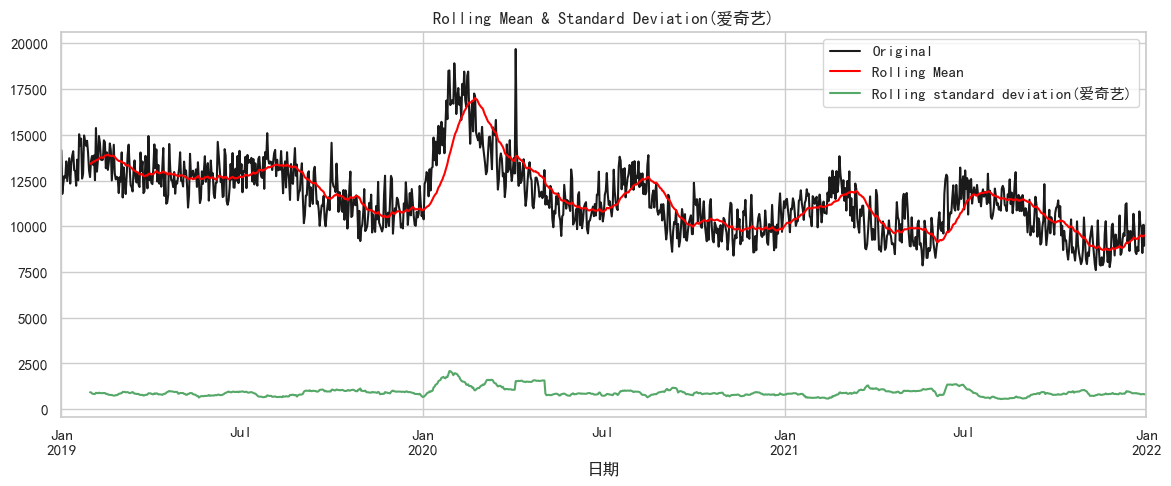

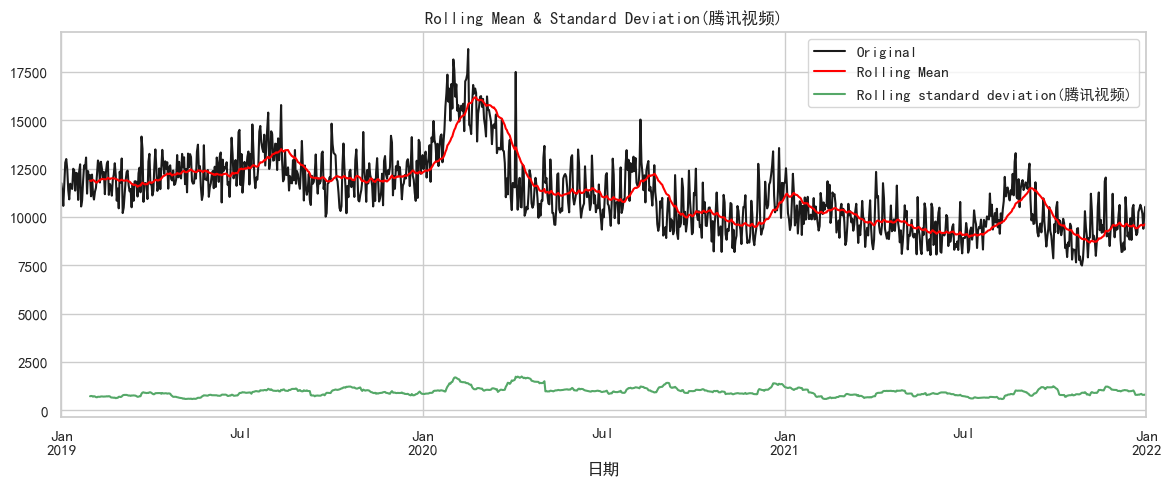

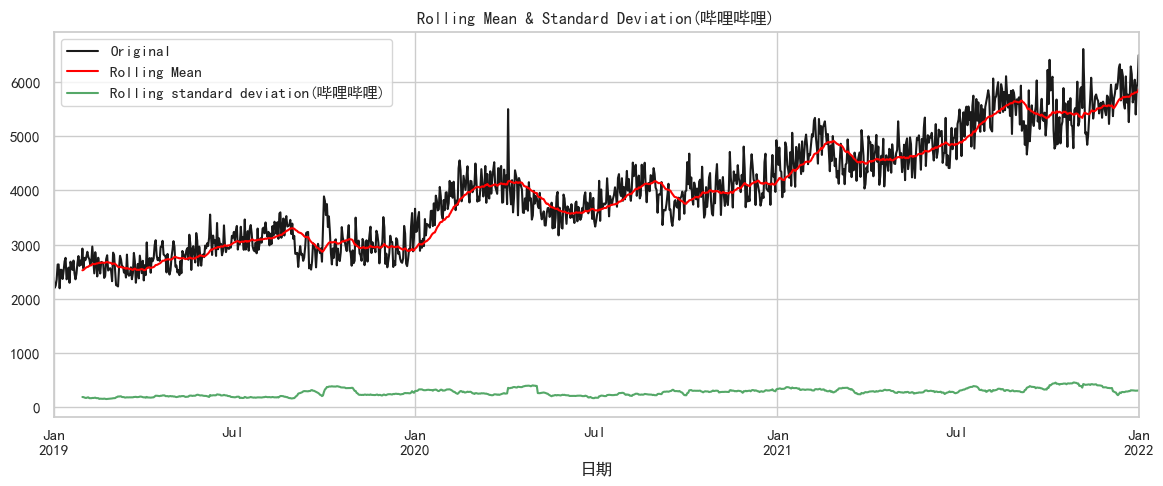

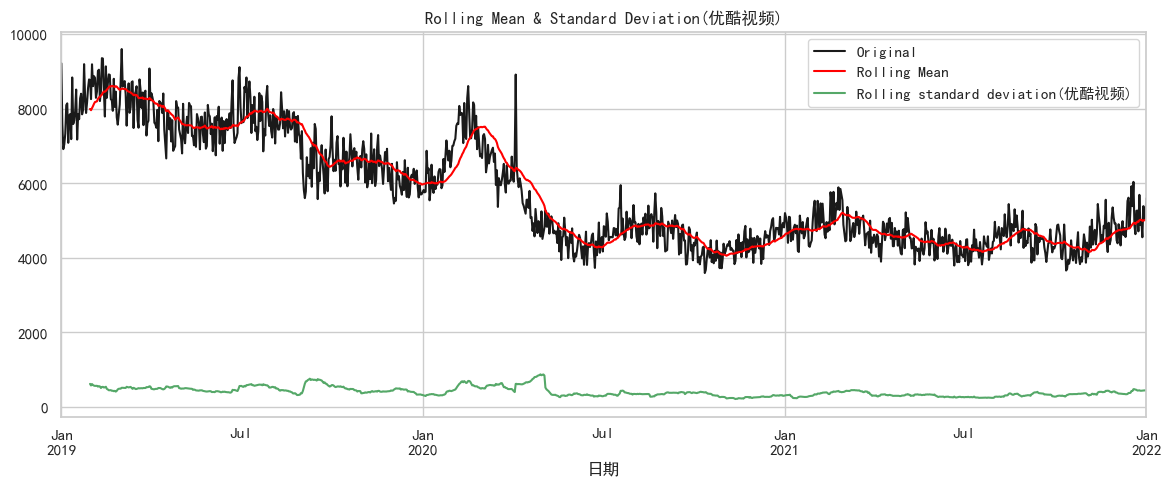

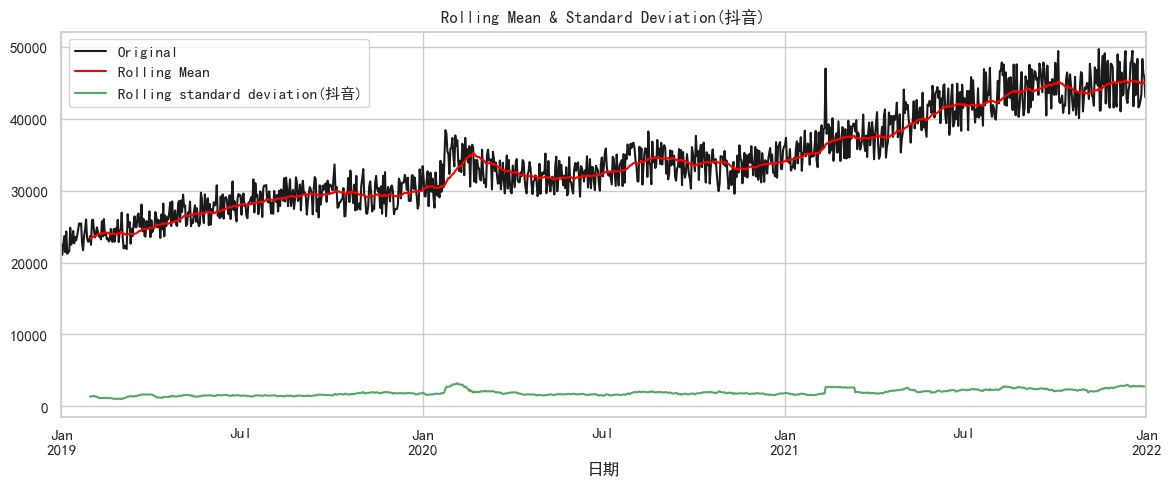

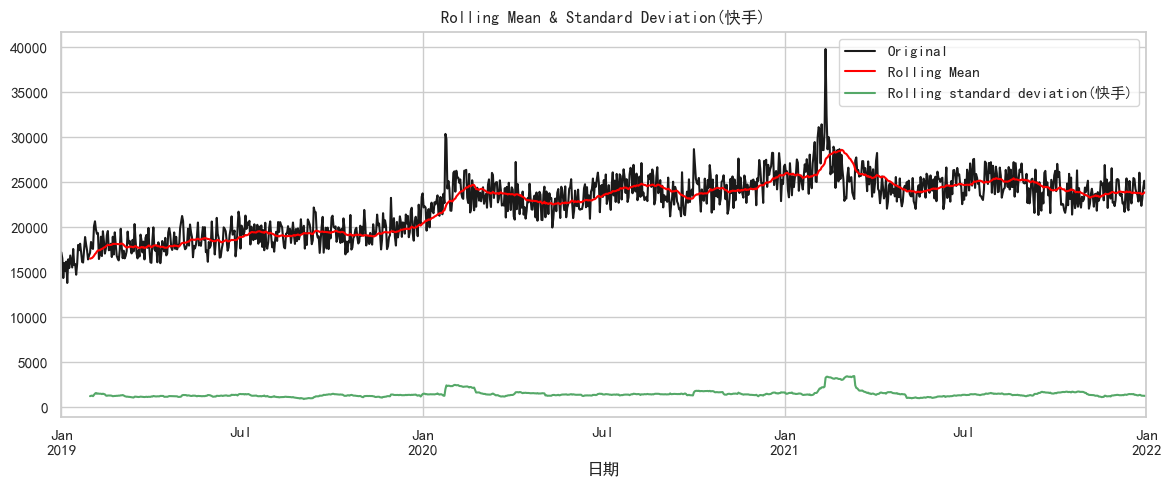

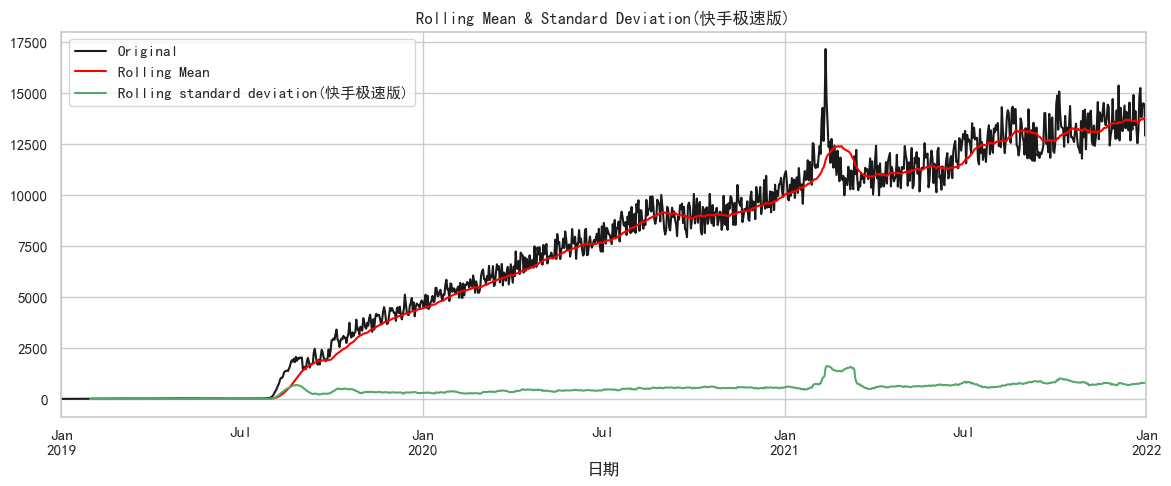

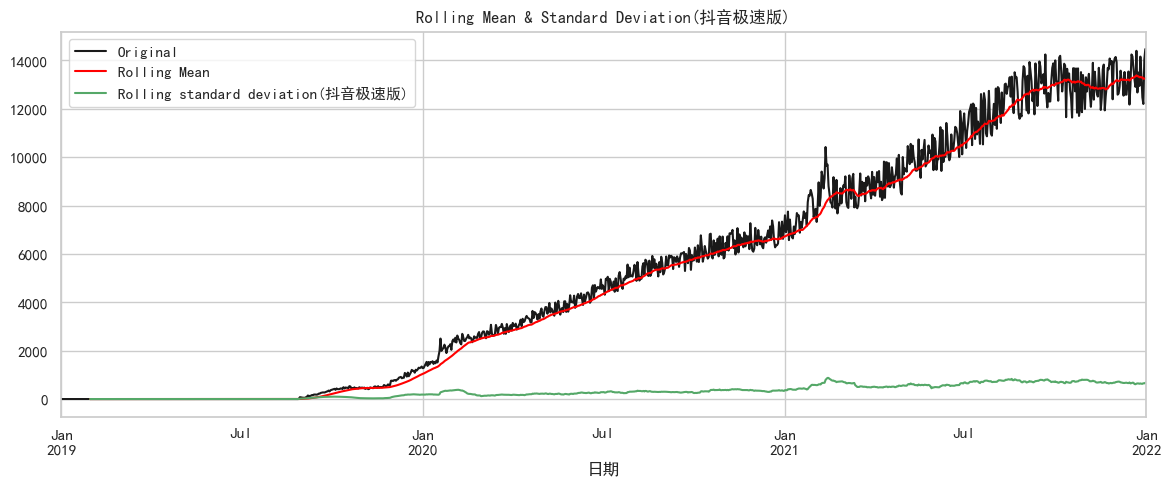

In [3]:
def draw_trend(timeseries, size):
    '''
    绘制时间序列趋势线，size是移动平均的窗口大小。绘制原始趋势及移动平均的水平和波动
    '''
    # 设置 Seaborn 主题（替代 plt.style.use('seaborn')）
    sns.set_theme(style="whitegrid")  # 可选风格：darkgrid, whitegrid, dark, white, ticks
    
    # 设置中文字体和绘图参数
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 12})
    
    warnings.filterwarnings("ignore")
    f = plt.figure(facecolor='white', figsize=(14,5))
    
    # 计算滚动均值和标准差
    rol_mean = timeseries.rolling(window=size).mean()
    rol_std = timeseries.rolling(window=size).std()
 
    # 绘图
    timeseries.plot(color='k', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='g', label='Rolling standard deviation({})'.format(timeseries.name))
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation({})'.format(timeseries.name))
    plt.show()

# 遍历每一列绘制趋势
for i in data.columns:
    draw_trend(data[i], 30)

<Axes: >

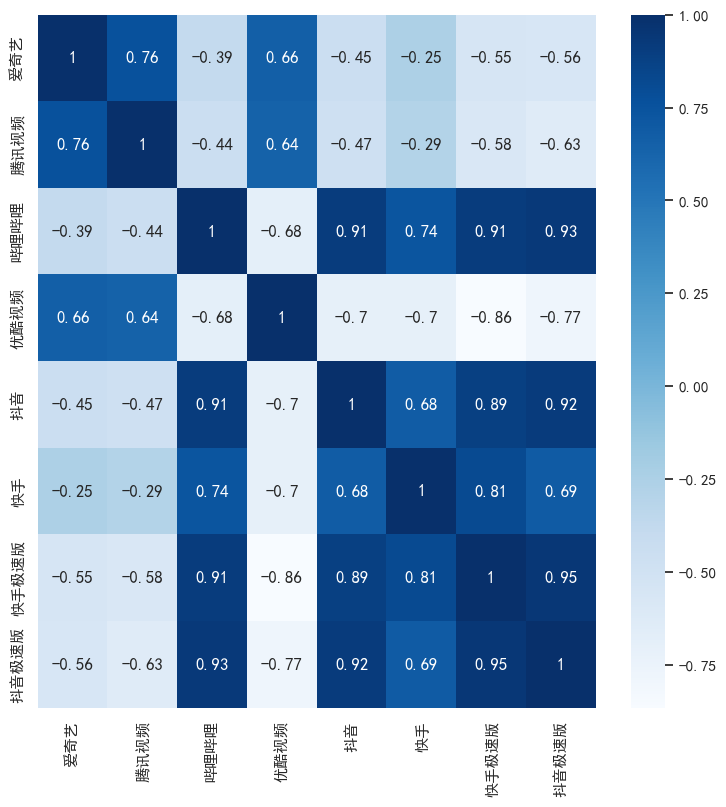

In [4]:
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

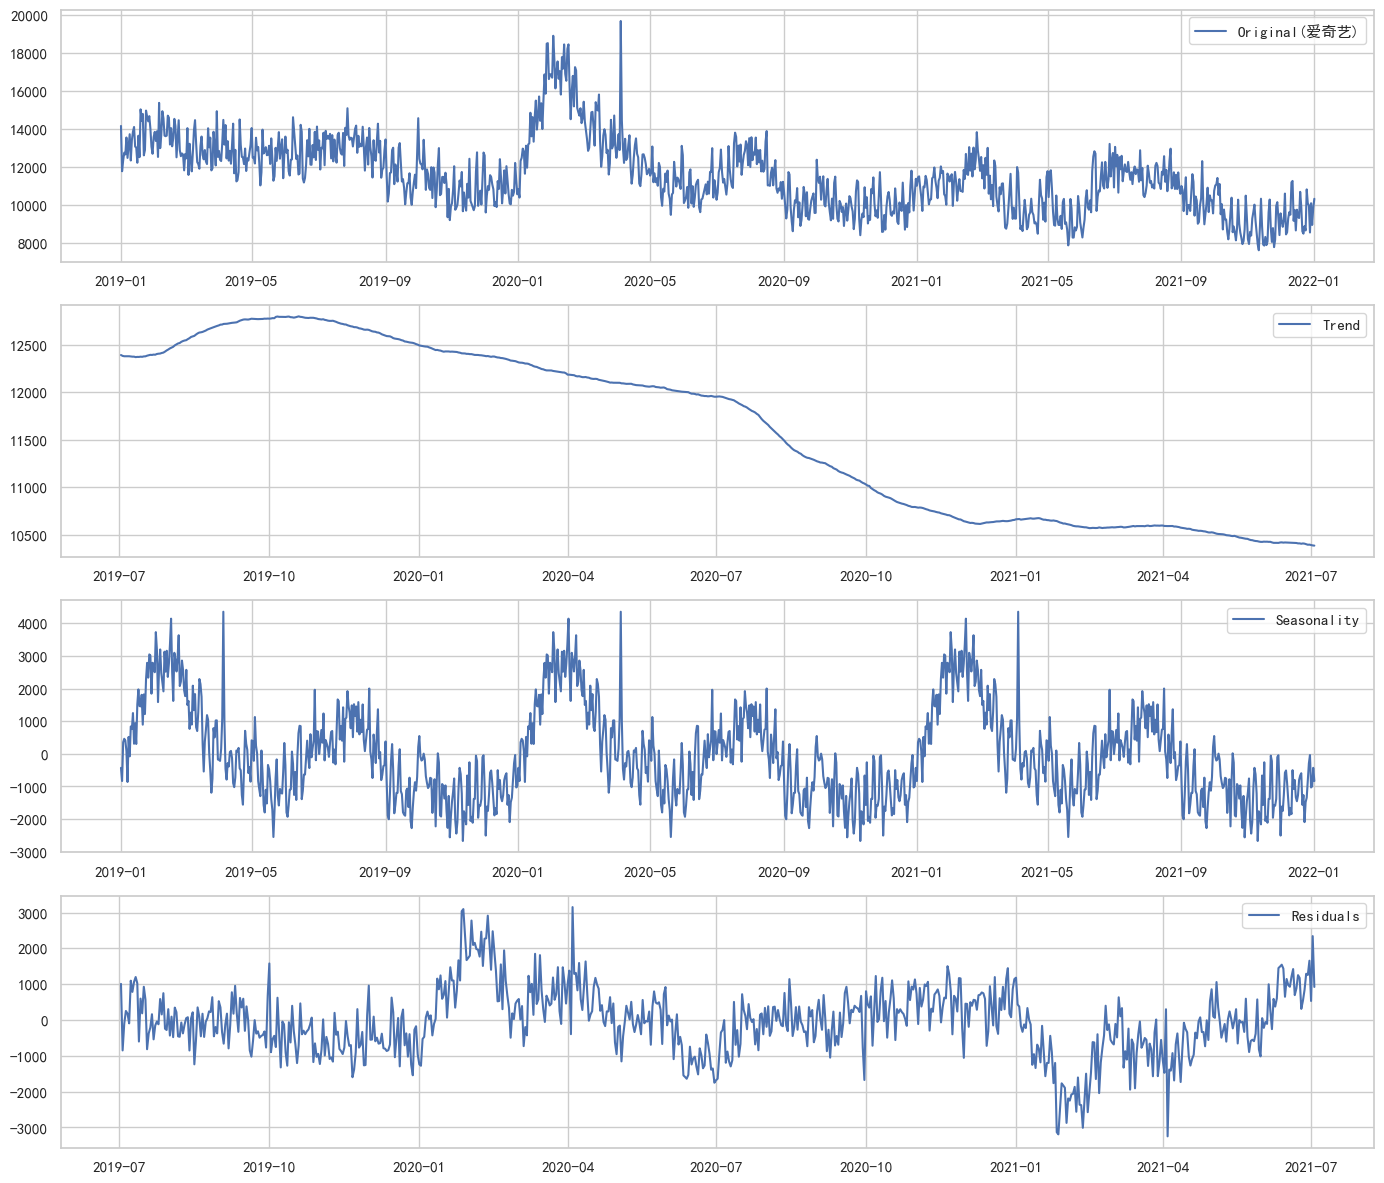

In [5]:
def decompose(timeseries,p=7):
    '''
    时间序列趋势分解的函数，timeseries是所需要分析的时序数据,p是需要确认的周期性的期数
    '''
    from statsmodels.tsa.seasonal import seasonal_decompose
    # 使画图中中文显示正常
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 12})
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries,period=p)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(facecolor='white',figsize=(14,12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original({})'.format(timeseries.name))
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend , seasonal, residual

trend,seasonal,residual = decompose(data.爱奇艺,p=365)

In [6]:
###构建节假日影响因素
import chinese_calendar as calendar #这是非常有用的一个包，可以为我们判定日期是不是中国传统节日以及节假日
data['节假日'] = [calendar.is_holiday(data.index[i]) for i in range(data.shape[0])]
data['暑假'] = 0
data.loc[(data.index>='2019-07-10')&(data.index<='2019-09-01'),'暑假'] = 1 
data.loc[(data.index>='2020-07-10')&(data.index<='2020-09-01'),'暑假'] = 1 
data.loc[(data.index>='2021-07-10')&(data.index<='2021-09-01'),'暑假'] = 1 
data['寒假'] = 0
data.loc[(data.index>='2019-02-01')&(data.index<='2019-03-01'),'寒假'] = 1 
data.loc[(data.index>='2020-02-01')&(data.index<='2020-03-01'),'寒假'] = 1 
data.loc[(data.index>='2021-02-01')&(data.index<='2021-03-01'),'寒假'] = 1 
data['疫情封城'] = 0
data.loc[(data.index>='2020-01-20')&(data.index<='2020-04-08'),'疫情封城'] = 1 
data

,爱奇艺,腾讯视频,哔哩哔哩,优酷视频,抖音,快手,快手极速版,抖音极速版,节假日,暑假,寒假,疫情封城
日期,,,,,,,,,,,,
2019-01-01,14158.00,11744.36,2382.89,9218.05,22565.08,17188.29,12.39,0.00,True,0,0,0
2019-01-02,11770.99,11294.81,2199.61,7597.31,21064.05,16522.15,9.65,0.00,False,0,0,0
2019-01-03,12338.03,10570.01,2240.74,6917.46,22354.29,14328.62,8.36,0.00,False,0,0,0
2019-01-04,12749.52,11681.37,2351.54,7047.51,23692.55,16004.04,11.83,0.00,False,0,0,0
2019-01-05,12655.60,12806.68,2630.86,7326.63,21445.66,15099.61,9.54,0.00,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,8541.07,10171.47,6044.51,4552.99,48318.18,23227.30,14410.21,12471.82,False,0,0,0
2021-12-29,10082.89,9386.61,5402.63,5387.21,46306.30,24457.21,14503.38,12197.58,False,0,0,0
2021-12-30,8939.84,10122.95,5910.43,5035.74,45761.07,25156.92,14440.69,14044.21,False,0,0,0


In [10]:
#生成数据集
data_prophet = data.copy()
data_prophet.columns = ['y', '腾讯视频', '哔哩哔哩', '优酷视频', '抖音', '快手', '快手极速版', '抖音极速版', '节假日',
       '暑假', '寒假', '疫情封城']
data_prophet['ds'] = data_prophet.index
data_prophet = data_prophet.drop(['节假日'],axis=1)

#区分训练集和测试集
### 历史数据
data_prophet_hist = data_prophet.loc[data_prophet.ds<='2021-07-01',:]
### 未来数据
data_prophet_future = data_prophet.loc[data_prophet.ds>='2021-07-01',:]

In [11]:
holidays_df = pd.DataFrame({
'holiday': 'holidays1',
'ds':data.loc[(data['节假日'])>=1].index.values,
'lower_window': 0,
'upper_window': 1})

10:14:01 - cmdstanpy - INFO - Chain [1] start processing
10:14:01 - cmdstanpy - INFO - Chain [1] done processing


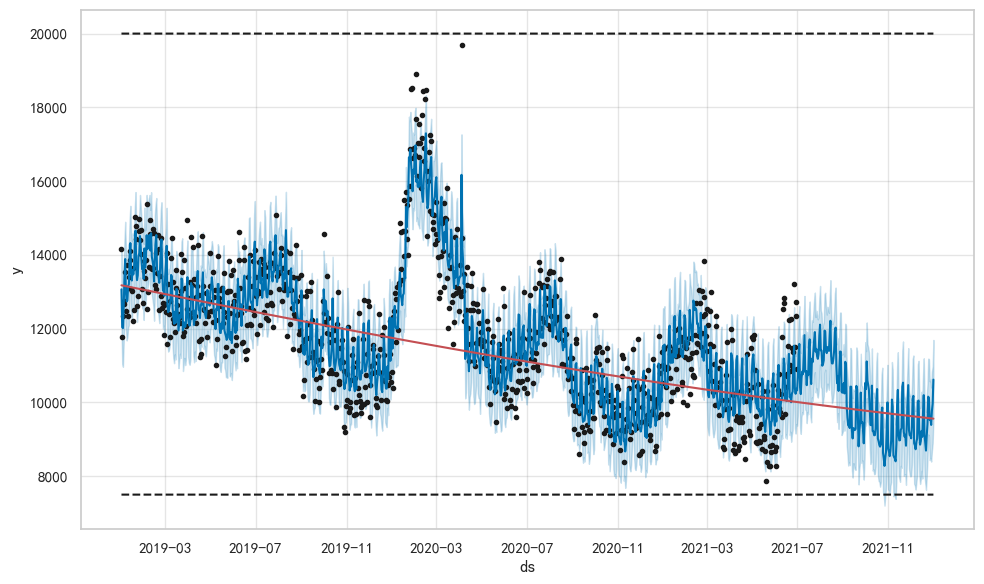

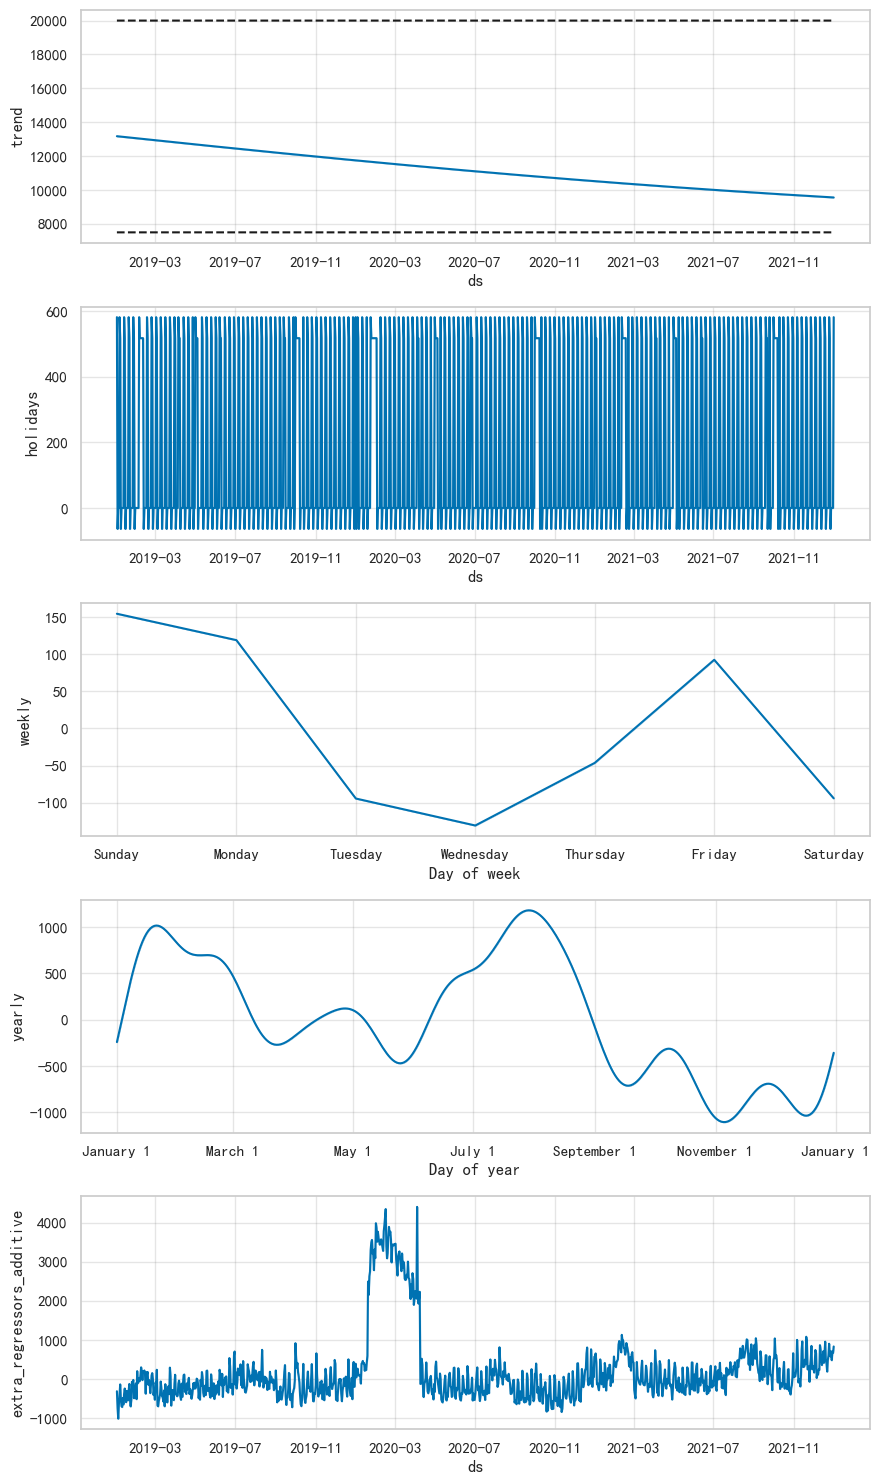

In [15]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
############ cap及floor设置值
cap = 20000  ##上限设置为20000
floor =  7500 ##下限为7500
data_prophet_hist['cap'] = cap
data_prophet_hist['floor'] = floor
m = Prophet(yearly_seasonality=True,growth='logistic',holidays=holidays_df)
#growth是时序变化趋势，有线性(linear)和非线性（logistic）两种
#holidays设置节假日的日期,我们令其等于上文中设置的holidays_df

#我们增加行业另外竞品数据作为回归项
for i in data_prophet_hist.columns[1:-3]:
    m.add_regressor(i)
m.fit(data_prophet_hist) # 放入历史数据训练

##生成预测数据集，用于预测未来
future = m.make_future_dataframe(periods=184)
future.index = future['ds']
future['cap'] = cap
future['floor'] = floor
for i in data_prophet_future.columns[1:-1]:
    future[i] = future['ds'].map(lambda x: data_prophet.loc[x, i] if x in data_prophet.index else None)

# 模型预测future
fcst = m.predict(future)
fig = m.plot(fcst)

a = add_changepoints_to_plot(fig.gca(), m, fcst)
plt.show()
fig2 = m.plot_components(fcst)
plt.show()

In [16]:
mape(df_prop.loc[df_prop.index>='2021-07-01','act_y'],df_prop.loc[df_prop.index>='2021-07-01','yhat'])

NameError: name 'df_prop' is not defined